<img src = 'https://drive.google.com/uc?id=1cPtoRUIVZ2jWaiIl8z1fm4R4V3kwQfZh
' width="170" height="190" align = "left">

# <font color = "darkgreen" > <b>Obiective</b></font>

---

În această lecție veți învăța despre:

- pachetul `numpy`
- tablouri multi-dimensionale
- generarea numerelor aleatoare


|                                                                                                                         |
| ----------------------------------------------------------------------------------------------------------------------- |
| <img src='https://drive.google.com/uc?id=1HV8Tdtn20fD2wdlz1hXrFRvgyQ-ZATIv' width="550"  ><figcaption align = "center"> |


# Numpy

" `Numpy` este pachetul de bază pentru efectuararea operațiilor științifice în Python. El conține, printre altele:

- un obiect de tip tablou N-dimensional
- funcții complexe pentru manipularea tablourilor
- elemente de algebră liniară [...] și capacitatea de a lucra cu numere generate aleator"
  ( conform paginii oficiale [Numpy](https://numpy.org/))

În ML se folosesc în mod frecvent tablourile multi-dimensionale și sunt efectuate diferite tipuri de operații matematice cu acestea. Librăria `PyTorch`, care poate fi folosită pentru lucrul cu rețele neuronale, se bazează pe `numpy`. Prin urmare, este necesar să vă familiarizați cu operațiile cu tablouri multidimensionale


#Lista atributelor/ funcțiilor `numpy` folosite

| atribut/ funcție | descriere                                                      |
| ---------------- | -------------------------------------------------------------- |
| len              | numărul de elemente al primei dimensiuni                       |
| dtype            | tipul elementelor tabloului (e.g. float/int)                   |
| shape            | returnează un tuplu cu lungimea fiecărei dimensiuni din tablou |
| reshape          | modifică structura unui tablou                                 |
| ndim             | numărul dimensiunilor tabloului                                |
| size             | numărul total de elemente                                      |


## Tablouri multidimensionale


> Un tablou (`array`) este un set de date cu valori de același tip.

Un tablou unidimensional (vector) ar putea fi format, de exemplu, din înălțimile tuturor elevilor dintr-o clasă: `[1.55, 1.78, 1.66, ...]`.

Un tablou de tablouri (vector de vectori sau matrice) este un tablou bidimensional (2D).

Un tablou de matrice este un tablou tridimensional (3D) ș.a.m.d.

> Generalizând, numim un astfel de obiect _tablou multidimensional_ ( chiar și în cazul tabloului cu dimensiunea 1 - care este considerat un caz particular al unui tablou multidimensional)


În capitolul anterior am reprezentat grafic puncte 2D. Datele au fost memorate în liste separate: o lista pentru valorile de pe axa `Ox` și una pentru valorile de pe axa `Oy`.

Putem obține același rezultat folosind un tablou 2D `numpy`.

În continuare vom analiza câteva exemple de tablouri cu dimensiuni superioare.

---


Vom considera câțiva indicatori ai calității aerului din România (sursa datelor [aici](https://aqicn.org/data-platform/covid19/verify/01e7b854-cffe-4f1b-877f-c433665f9c42)).

Putem reprezenta particulele ${PM_{10}}$ (particule cu diametru mai mic de 10 microni) care sunt periculoase pentru sistemul respirator.

Vom folosi un tablou bidimensional (matrice): pe coloane memorăm locația, iar pe linii datele calendaristice în care au fost efectuate măsuratorile.

Pentru a ține evidența mai multor indicatori, cum ar fi temperatura sau dioxidul de sulf (${SO_2}$), vom adăuga o a treia dimensiune și astfel se obține un tablou 3D.
![table](https://drive.google.com/uc?export=view&id=1en9jkU2xk6tovCbTPX7yeb7SvXx8b1Z5)


Să presupunem că vrem să calculam media aritmetică a valorilor ${PM_{10}}$ măsurate într-o zi în toate orașele sau media aritmetică a tuturor măsuratorilor efectuate pentru un anumit oraș.

Veți vedea cum, folosindu-ne de tablouri `numpy`, efectuarea acestor calcule se face într-un mod extrem de ușor.

Vom folosi și funcțiile din biblioteca `matplotlib` pentru o reprezentare grafică relevantă.


> Pentru început, vom încărca datele despre calitatea aerului din fișierul `airqro.csv`.

❗️❗️ Înainte, încărcați fișierul din folderul [resources](https://drive.google.com/drive/folders/1M9otFTE7NsY-zBa9CCOTnZLuXF3a9qEj?usp=sharing) în mașina virtuală.


Datele din fișierul `.csv` vor fi extrase în liste de date:

- `locations`, pentru orașe
- `indicators`, pentru tipul de măsuratori: ${PM_{10}}$, ${SO_2}$ și temperatură


In [ ]:
# We have air quality data for the following locations
locations = [
    f"Arad",
    f"Bacău",
    f"Baia Mare",
    f"Brăila",
    f"Braşov",
    f"Bucharest",
    f"Cluj-Napoca",
    f"Constanţa",
    f"Craiova",
    f"Galaţi",
    f"Iaşi",
    f"Oradea",
    f"Piteşti",
    f"Ploieşti",
    f"Râmnicu Vâlcea",
    f"Sibiu",
    f"Timişoara",
]

In [ ]:
# We have measurements for the following indicators
indicators = [f"pm10", f"so2", f"temperature"]

Fiecare linie a fișierului .csv conține: data, orașul, tipul indicatorului, valoarea măsurată.

Datele sunt ordonate după indicator, apoi după oraș și dată.

Există 62 de înregistrări zilnice pentru fiecare locație, un total de `3162` linii = `62` zile _ `17` locații _ `3` indicatori (pm10, so2, temperatură)

Se vor crea 3 liste de date, câte una pentru fiecare indicator: `pm10_values, so2_values, temperature_values`


In [3]:
# Each line in the csv file contains: date, city, indicator, median value.
# The data is sorted by indicator, then by city, then by date.
# There are 62 daily readings per location and per indicator, for a total of
# 3162 lines = 62 days * 17 locations * 3 indicators (pm10, so2, temperature)
import csv

num_days = 62
num_locations = len(locations)  # 17
num_indicators = len(indicators)  # 3
fname = "/content/airqro.csv"
pm10_values = []
so2_values = []
temperature_values = []


# define a function for extracting the indicator value from a line in the file
def extract_value(inputs):
    # the value of interest is on the last position; convert to number
    return float(inputs[-1])


# we will read the values for each indicator
num_lines = 0
with open(fname) as csvfile:
    datareader = csv.reader(csvfile)
    for row in datareader:
        # extract numeric value from row and add it to the corresponding list
        val = extract_value(row)
        if "pm10" in row:
            pm10_values.append(val)
        elif "so2" in row:
            so2_values.append(val)
        else:
            temperature_values.append(val)
        num_lines += 1
    csvfile.close()

# print the number of lines read to make sure the data is what we expected
print(num_lines)

FileNotFoundError: [Errno 2] No such file or directory: '/content/airqro.csv'

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Verificăm numărul de elemente din fiecare listă creată. ( 62 de zile \* 17 orașe = 1054 valori)


In [ ]:
# Check the number of elements in each list
len(pm10_values)
# len(so2_values)
# len(temperature_values)

1054

## Crearea tablourilor `numpy` din listele de valori


Pentru a lucra mai ușor cu datele, vom transfera valorile din liste în tablouri `numpy`


In [ ]:
# We will now create numpy arrays from these lists for easier manipulation
import numpy as np

pm10_np = np.array(pm10_values)
so2_np = np.array(so2_values)
temperature_np = np.array(temperature_values)

Se va afișa numărul de elemente ale primei dimensiuni `numpy` folosind atributul `shape`.

> ❗️❗️❗️ `shape` afișează un _tuplu_ de valori, fiecare element din tuplu reprezentând numărul de elemente al unei dimensiuni a tabloului.

> Vă reamintim că ați învățat despre _tupluri_ în `Python` în [ Lecția 7 - Tupluri](https://www.pyml.ro/lectia-07-tupluri-in-python-01.php)


In [ ]:
# Let's see the shapes of these arrays using 'shape' attribute
pm10_np.shape

(1054,)

Afișăm primele 10 elemente ale tabloului `pm10_np`


In [ ]:
pm10_np[:10]

array([ 9.,  7.,  8., 10., 10., 10.,  8.,  8., 12., 12.])

Vedem tipul elementelor tabloului `pm10_np` folosind atributul `dtype`


In [ ]:
# Check the type using the 'dtype' attribute
pm10_np.dtype

dtype('float64')

Vom modifica structura tablourilor, adăugand coloana pentru locație, fără a modifica datele existente.
Vom folosi funcția `reshape` cu parametrul `order ='F'`, parcurgerea efectuându-se pe linie.


In [ ]:
# Let's reshape each array to have each location as a new column; we will use
# 'reshape' with order parameter ='F', such that the first dimension (the row)
# changes fastest
pm10_np = pm10_np.reshape([num_days, num_locations], order="F")

Afișăm primele 10 valori pentru prima locație.


In [ ]:
pm10_np[:10, 0]

array([ 9.,  7.,  8., 10., 10., 10.,  8.,  8., 12., 12.])

Verifcăm din nou numărul elementelor din prima dimensiune a tabloului ( 62 de înregistrări pentru 17 orașe)


In [ ]:
# Check the shape again
pm10_np.shape

(62, 17)

In [ ]:
# Note that we could have provided only 1 dimension like this
# pm10_np = pm10_np.reshape([num_days, -1])
# and the interpreter infers the missing dimension on its own as it knows the
# total number of elements in the array and the size of one dimension.

## Indexarea în tablourile `numpy`


`pm10_np[:, 0]` va afișa valorile din prima locație ( prima coloană)


In [ ]:
# Let's print the values for the first location.
pm10_np[:, 0]  # print all the values on the first column

array([ 9.,  7.,  8., 10., 10., 10.,  8.,  8., 12., 12., 12., 16., 17.,
       16., 19., 20., 17., 15., 13., 15., 18., 22., 22., 18., 11., 11.,
       10., 10.,  9., 14., 18., 19., 14., 13., 13., 13., 16., 16., 14.,
       13., 19., 20., 12., 10., 11., 12., 19., 22., 21., 20., 29., 20.,
       19., 16., 18., 20., 18., 16., 38., 24., 22., 16.])

Afișarea valorilor măsurate pentru toate locațiile, în prima zi.


In [ ]:
# Print the values for all locations for the first day
pm10_np[0]  # this is equivalent to writing pm10_np[0, :]

array([ 9., 10.,  8.,  4.,  5., 11., 11.,  9., 13.,  6., 12., 21., 13.,
       11.,  9.,  7., 11.])

Afișarea valorilor măsurate pentru toate locațiile, în ultima zi.


In [ ]:
# Print the values for all locations for the last day
pm10_np[-1]

array([16., 26., 23., 29., 28., 61., 39., 25., 41., 26., 56., 42., 32.,
       23., 19., 38., 44.])

Afișarea valorilor măsurate pentru ultima locație, în primele 7 zile.


In [ ]:
# Print the values for the last location, for the first seven days
pm10_np[:7, -1]

array([11.,  9., 13., 14., 17., 12., 10.])

Afișarea valorilor măsurate pentru a treia locație, în toate zilele.
În comentariu verificăm dimensiunea pentru a fi siguri că numărul de elemente este cel corect.


In [ ]:
# Access the values in the 3rd location every other day
pm10_np[::2, 2]
# Check the shape to make sure it has the number of elements you expect
# pm10_np[::2, 2].shape

array([ 8.,  8., 14., 10., 16., 12., 19., 27., 22., 23., 26., 27., 22.,
       20., 21., 31., 24., 29., 49., 28., 21., 18., 15., 24., 23., 22.,
       22., 35., 33., 36., 25.])

In [ ]:
pm10_np[:10, 0]

array([ 9.,  7.,  8., 10., 10., 10.,  8.,  8., 12., 12.])

## Indexarea cu valori logice (boolean)


Ne propunem să aflăm în câte zile valoarile măsurate pentru pm10 sunt peste un anumit prag. Vom atribui pragului o valoare pentru ca apoi să generăm o mască logică pentru fiecare index.


In [ ]:
# Let's assume we want to know in how many days the pm10 value was above some
# critical threshold.
# Define threshold
th = 60
# Generate boolean mask to index the array
bmask = pm10_np > th

Afișăm valorile, după aplicarea măștii logice


In [ ]:
# print the mask to see what it looks like
bmask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Pentru a număra zilele în care a fost depășit pragul, însumăm valorile din masca logică. `False` va avea valoarea 0 și `True` valoarea 1


In [ ]:
# To count the number of days above the threshold, we can sum over the mask.
# False will be considered 0 and True is 1.
bmask.sum()

7

Pentru a vedea valorile care depășesc pragul:


In [ ]:
# To actually see the values:
pm10_np[bmask]

array([62., 62., 66., 62., 62., 66., 61.])

## Cozile și tablourile `numpy`


Pentru simplificare, putem crea un singur tablou multi-dimensional pentru toți indicatorii. Vom folosi o strcutură de tip stivă pentru crearea unui tablou tridimensional. Pentru aceasta, trebuie să specificăm dimensiunea la care ne raportăm în crearea stivei, folosind parametrul `axis`.
Se va genera o eroare deoarece cele 3 tablouri pe care încercăm să le adăugăm în stivă nu au aceeași lungime (`shape`)


In [ ]:
# For convenience, we can create a single multi-dim array for all the indicators
# using 'stack' to create a 3D array. We have to indicate the dimension
# along which to stack using 'axis' parameter.
# (this results in an error, see below)
all_vals = np.stack([pm10_np, so2_np, temperature_np], axis=-1)

ValueError: ignored

Vom modifica tablourile `so2_np` și `temperature_np` pentru a avea aceeași structură cu a tabloului `pm10_np`


In [ ]:
# The above results in an error, as the arrays we try to stack do not have
# the same shape. We first need to reshape 'so2_np', 'temperature_np', to have
# the same shape as pm10_np
so2_np = so2_np.reshape([-1, num_locations], order="F")
temperature_np = temperature_np.reshape([num_days, -1], order="F")

Modificarea se poate face și direct, prin copierea structurii.


In [ ]:
# Note that we could have also used this since we want these arrays to have the
# same shape
so2_np = so2_np.reshape(pm10_np.shape)

Acum putem adăuga valorile în stivă.


In [ ]:
# Now try again to stack
all_vals = np.stack([pm10_np, so2_np, temperature_np], axis=-1)

O verificare a structurii ne va arată 62 de zile, pentru 17 orașe si 3 indicatori.


In [ ]:
# Check the shape
all_vals.shape

(62, 17, 3)

## Operații cu dimensiuni


După adăugarea în stivă, putem efectua seturi suplimentare de calcule.


> Media aritmetică a valorilor ${PM_{10}}$ în toate orașele, pentru toate zilele:


In [ ]:
# Let's see the average over all pm10 levels in all cities over all days
np.mean(all_vals[:, :, 0])

22.57874762808349

> Media artimetică a valorilor ${PM_{10}}$ pentru fiecare oraș:


In [ ]:
# Let's see the average over all pm10 levels in every city
np.mean(all_vals[:, :, 0], axis=0)

array([15.64516129, 19.37096774, 23.08064516, 13.48387097, 22.4516129 ,
       27.53225806, 31.83870968, 13.59677419, 27.17741935, 14.30645161,
       25.91935484, 28.08064516, 29.11290323, 24.93548387, 15.56451613,
       29.87096774, 21.87096774])

> Cele mai mari valori înregistrate în fiecare oraș:


In [ ]:
# Let's see the maximum levels per city
np.max(all_vals[:, :, 0], axis=0)

array([38., 50., 49., 30., 62., 66., 66., 29., 52., 41., 62., 49., 52.,
       49., 29., 60., 55.])

## Vizualizare


Vom reprezenta grafic valorile ${PM_{10}}$ înregistrate pentru toate locațiile, în toate zilele: folosim culori deschise pentru valorile mari și culori mai închise pentru valorile scăzute.


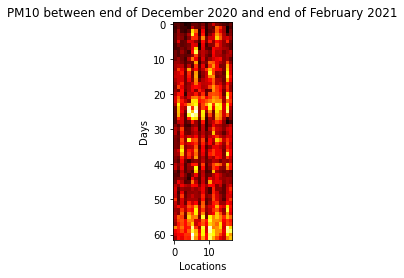

In [ ]:
# We can plot the data for all locations in all days to have a global view.
# Using 'hot' as colourmap will draw in bright colours the large values and in
# dark colours the low values.
import matplotlib.pyplot as plt

plt.imshow(pm10_np, cmap="hot", interpolation="nearest")
plt.xlabel("Locations")
plt.ylabel("Days")
plt.title("PM10 between end of December 2020 and end of February 2021")
plt.show()

Reprezentarea pentru ${SO_2}$ este:


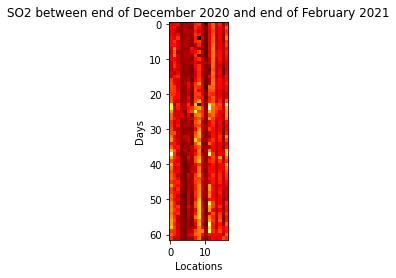

In [ ]:
# let's look at SO2 levels
plt.imshow(so2_np, cmap="hot", interpolation="nearest")
plt.xlabel("Locations")
plt.ylabel("Days")
plt.title("SO2 between end of December 2020 and end of February 2021")
plt.show()

Reprezentarea pentru temperatură:


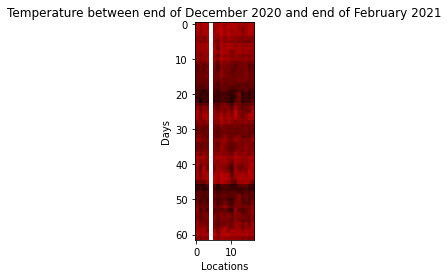

In [ ]:
# let's look at the temperature as well
plt.imshow(temperature_np, cmap="hot", interpolation="nearest")
plt.xlabel("Locations")
plt.ylabel("Days")
plt.title("Temperature between end of December 2020 and end of February 2021")
plt.show()

Se poate observa o coloana atipică în reprezentarea de mai sus. Aceasta corespunde orașului Brașov, valorile fiind într-adevăr eronate, probabil din cauza unui senzor defect.

Analiza reprezentării grafice face posibilă identificare mai rapidă a erorilor pentru a le corecta.


Vom reprezenta grafic, cu ajutorul culorilor, valorile _sigure_ (în nuanțe de albastru-verde) și pe cele _periculoase_ (culoare roșie).
De exemplu, pentru ${PM_{10}}$, legislația UE consideră că valorile mai mici de 40 de microni sunt sigure.


In [ ]:
# @title Personalizarea culorilor din hărți
# Helper class to allow us to set the colour levels we want, i.e. to say when
# a value is dangerous.
import matplotlib.colors as colors


class MidpointNormalize(colors.Normalize):
    """
          Normalise the colorbar so that diverging bars work there way either side from
    a prescribed midpoint value)

          e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

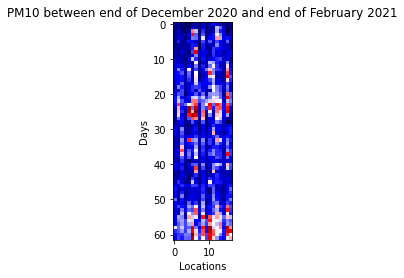

In [ ]:
# plt.imshow(pm10_np, cmap='seismic', interpolation='nearest')
plt.imshow(pm10_np, cmap="seismic", norm=MidpointNormalize(midpoint=40))
plt.xlabel("Locations")
plt.ylabel("Days")
plt.title("PM10 between end of December 2020 and end of February 2021")
plt.show()

Afișarea datelor pentru un anumit oraș: București - al șaselea în lista


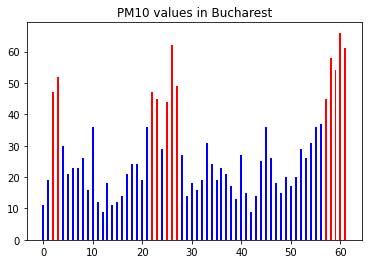

In [ ]:
# plot the values for a particular city, e.g. Bucharest, 6th in the list
import datetime

points = pm10_np[:, 5]
# to display in red the days with dangerous values, we use boolean indexing
mask_safe = np.array(points < 40)
mask_unsafe = np.array(points >= 40)
plt.bar(
    np.array(range(len(points)))[mask_safe], points[mask_safe], width=0.4, color="b"
)
plt.bar(
    np.array(range(len(points)))[mask_unsafe], points[mask_unsafe], width=0.4, color="r"
)
plt.title("PM10 values in Bucharest")
plt.show()

Afișarea detelor pentru Arad, primul în listă:


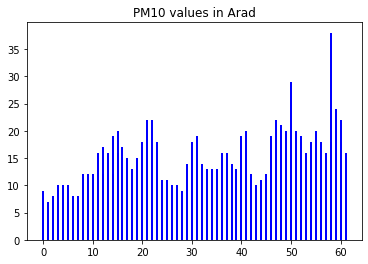

In [ ]:
# compare this to e.g. Arad, 1st in the list
import datetime

points = pm10_np[:, 0]
mask_safe = np.array(points < 40)
mask_unsafe = np.array(points >= 40)
plt.bar(
    np.array(range(len(points)))[mask_safe], points[mask_safe], width=0.4, color="b"
)
plt.bar(
    np.array(range(len(points)))[mask_unsafe], points[mask_unsafe], width=0.4, color="r"
)
plt.title("PM10 values in Arad")
plt.show()

## Temă

Fiind date coordonatele (latitudine, longitudine) mai multor locații, să se creeze și să se afișeze o hartă pentru diferiți indicatori


In [ ]:
# locations latitude and longitude
locations = {}
locations[f"Ploiești"] = (44.9333, 26.0333)
locations[f"Craiova"] = (44.3193, 23.8006)
locations[f"Bacău"] = (46.5688, 26.9160)
locations[f"Râmnicu Vâlcea"] = (45.0997, 24.3693)
locations[f"Sibiu"] = (45.7936, 24.1213)
locations[f"Timișoara"] = (45.7606, 21.2267)
locations[f"Piteşti"] = (44.8565, 24.8692)
locations[f"Arad"] = (46.1866, 21.3123)
locations[f"Cluj-Napoca"] = (46.7704, 23.5914)
locations[f"Bucharest"] = (44.4396, 26.0963)
locations[f"Baia Mare"] = (47.6567, 23.5850)
locations[f"Oradea"] = (47.0465, 21.9189)
locations[f"Galaţi"] = (45.4353, 28.0080)
locations[f"Brașov"] = (45.6579, 25.6011)
locations[f"Iași"] = (47.1635, 27.5825)
locations[f"Constanţa"] = (44.1598, 28.6348)
locations[f"Brăila"] = (45.2652, 27.9595)

# Mai multe despre `numpy`


##Broadcasting


In [ ]:
import numpy as np

ar = np.array([[0, 1], [6, 2]])

Termenul _broadcasting_ se referă la abilitatea `NumPy` de a lucra cu tablouri de diferite dimensiuni în cadrul operațiilor aritmetice. În matematică, calculele sunt posibile între tablouri de aceleași dimensiuni. În Python, dacă două tablouri nu au aceeași dimensiune, operația se va efectua prin adaptarea dimensiunilor astfel încât să devină posibilă efectuarea calculului aritmetic.


In [ ]:
np.minimum(ar, 3.5)

array([[0. , 1. ],
       [3.5, 2. ]])

Numpy convertește automat valoarea numerică `3.5` într-un tablou cu aceeași dimensiune cu a tabloului `ar`. Transformarea este necesară pentru a putea calcula valoarea minimă.

![table](https://drive.google.com/uc?export=view&id=174Yjs08xsE4Rz7dt2k5CFT8wy7ppddSY)


Conversia implicită poate scuti scrierea liniilor de cod, dar în cazuri mai complexe trebuie să se înțeleagă bine regulile aplicate.

Câteva referințe puteți găsi la:

- [Pagina Numpy despre conversie - broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)
- [Broadcasting cu exemple vizuale](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)


> În continuare vom oferi câteva exemple utile de conversii.


In [ ]:
# Centering our array.
print("centered array:\n", ar - np.mean(ar))

centered array:
 [[-2.25 -1.25]
 [ 3.75 -0.25]]


Observați că `np.mean()`, deși este o valoare numerică, este scăzută automat din fiecare element al tabloului.


Putem defini propria funcție pentru calculul valorii minime.


In [ ]:
clipped_ar = ar.copy()  # So that ar is not modified.
clipped_ar[clipped_ar > 3.5] = 3.5
clipped_ar

array([[0, 1],
       [3, 2]])

Ce se execută:

1. 3.5 este distribuit în relația de inegalitate (>)
2. Operatorul > definește un selector care va extrage o submulțime ce respectă condiția >.
3. 3.5 a fost distribuit la numărul corect de elemente în atribuire.


Vectorii pot fi convertiți în matrice.


In [ ]:
vec = np.array([1, 2])
ar + vec

array([[1, 3],
       [7, 4]])

Dimensiunile tablourilor sunt:

```
ar     (2d array):  2 x 2
vec    (1d array):      2
Result (2d array):  2 x 2
```

Când oricare din dimensiunile comparate este 1 ( chiar și implicit, ca în cazul tabloului `vec`), se folosețte cealaltă dimensiune. Altfel spus, dimnensiunile egale cu 1 sunt ajustate sau copiate astfel încât să se potrivească celorlalte dimensiuni .

în cazul de mai sus, linia `[1, 2]` se repetă de mai multe ori pentru a se potrivi numărului de linii din `ar`, pentru ca apoi să se efectueze adunarea.


Dacă va fi o neconcordanță între dimensiuni, compilarorul va genera eroare.


Decomentatți linia de mai jos și rulați programul.


In [ ]:
# ar + np.array([[1, 2, 3]])

#### Exercițiu

Transformați și însumați vectorul `[10, 20, 30]` în concordanță cu coloanele din tabloul `ar`.

Ar trebui să obțineți un rezultat similar cu:

```
array([[10. , 10.2],
       [20.9, 20.5],
       [30.3, 30.7]])
```


In [ ]:
vec = np.array([[10], [20], [30]])
ar + vec

##Numere aleatoare


Sunt situații în care trebuie să generăm numere aleatoare, cum ar fi, de exmplu, inițializarea parametrilor unei rețele neuronale la începutul antrenamentului.
În mod normal, calculatoarele nu pot genera cu adevărat numere aleatoare.

Mai degrabă se generează valori pseudo-aleatoare, valori ce par a fi alese la întâmplare, deși succesiunea poate fi intuită datorită inițializărilor făcute(cele de pornire).

Pentru a genera secvențe aleatoare și calculele reproductibile, trebuie să inițializăm valoarea de pornire și să folosim aceeași valoare.

- funcția [`np.random.seed()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html) inițializează valoarea de start, sau
- clasa [`np.random.RandomState`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) , care este un container pentru numere generate pseudo-aleator și oferă metode pentru generarea aleatoare a numerelor.


In [ ]:
np.random.seed(0)
print("   >>  Setting the random seed to 0")
print(np.random.random())
print(np.random.random())
print(np.random.random())
# Reset the global random state to the same state.
np.random.seed(0)
print("  >>  Resetting the random seed to 0")
print(np.random.random())
print(np.random.random())
print(np.random.random())

# Generating an array of size 2x2x3
print(np.random.random(size=(2, 2, 3)))

   >>  Setting the random seed to 0
0.5488135039273248
0.7151893663724195
0.6027633760716439
  >>  Resetting the random seed to 0
0.5488135039273248
0.7151893663724195
0.6027633760716439
[[[0.54488318 0.4236548  0.64589411]
  [0.43758721 0.891773   0.96366276]]

 [[0.38344152 0.79172504 0.52889492]
  [0.56804456 0.92559664 0.07103606]]]


Pentru a permuta aleator o secvență sau pentru a returna o permutare a unui domeniu de valori, vom folosi `random.permutation`

> ` random.permutation(x)`

Dacă x este un tablou multidimensional, permutarea se va efectua doar de-alungul primului index.


Permutarea valorilor dintr-un domeniu de valori:


In [ ]:
np.random.permutation(10)

array([9, 4, 2, 7, 6, 0, 5, 8, 1, 3])

Permutarea valorilor dintr-un vector


In [ ]:
np.random.permutation([1, 4, 9, 12, 15])

array([ 4, 12, 15,  9,  1])

Permutarea într-un tablou multi-dimensional


In [ ]:
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.random.permutation(arr)

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

# Concluzii


Ne-am familiarizat cu `numpy`, o librărie Python puternică pentru operarea tablourilor multi-dimensionale.
Împreună cu librăria `matplotlib` studiată în lecția anterioară, se pot crea unelte vizuale utile în investigarea datelor multi-dimensionale.
